## D-39 Real Estate - Price Predictor


In [1]:
import pandas as pd


In [2]:
housing = pd.read_csv("vats.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>, <AxesSubplot:>]],
      dtype=object)

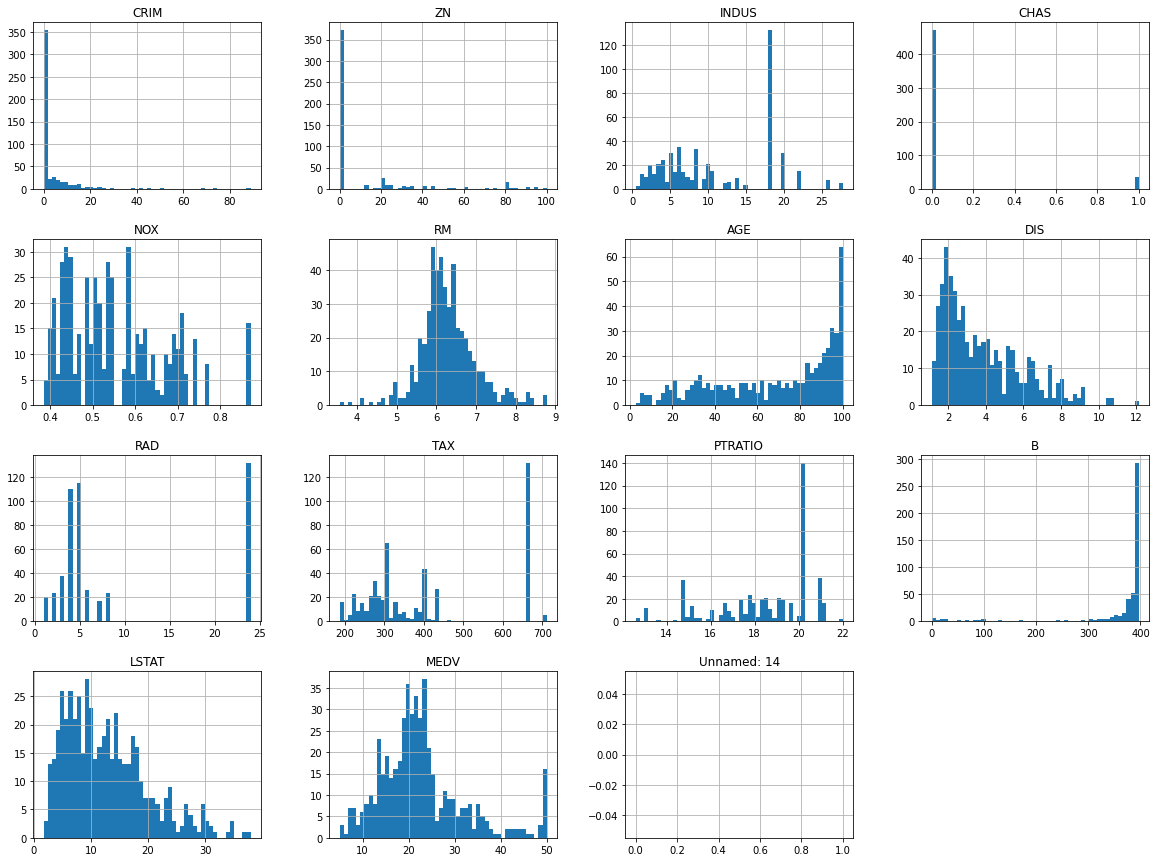

In [9]:
housing.hist(bins=50, figsize=(20, 15))

## train-test spliting

In [10]:
## for learning purpose
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
#train_set, test_set = split_train_test(housing, 0.2)

In [12]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


Rows in train set: 404
Rows in test set: 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## looking for correlation

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV           1.000000
RM             0.695360
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
AGE           -0.376955
RAD           -0.381626
CRIM          -0.388305
NOX           -0.427321
TAX           -0.468536
INDUS         -0.483725
PTRATIO       -0.507787
LSTAT         -0.737663
Unnamed: 14         NaN
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

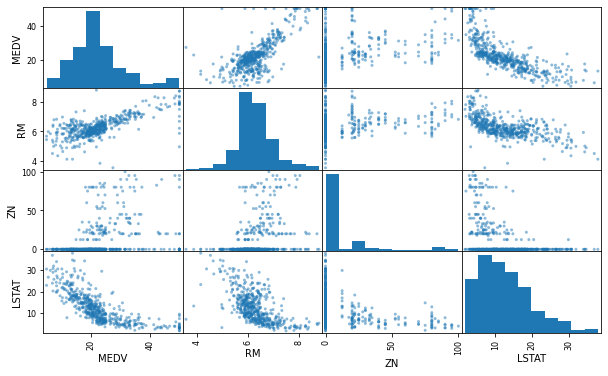

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (10,6))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

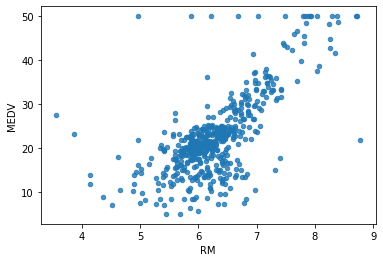

In [20]:
housing.plot(kind="scatter", x="RM" , y="MEDV" , alpha=0.8)

## Trying out Attribute combinations

In [21]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,31.061984


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV           1.000000
RM             0.695360
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
AGE           -0.376955
RAD           -0.381626
CRIM          -0.388305
NOX           -0.427321
TAX           -0.468536
INDUS         -0.483725
PTRATIO       -0.507787
TAXRM         -0.537650
LSTAT         -0.737663
Unnamed: 14         NaN
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

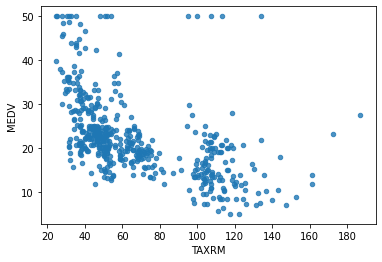

In [24]:
housing.plot(kind="scatter", x="TAXRM" , y="MEDV" , alpha=0.8)

## Missing Attributes


In [25]:
housing = strat_train_set.drop("MEDV" , axis= 1)
housing_labels = strat_train_set["MEDV"].copy()

In [26]:
# to take care of missing attributes , you have 3 option:
# 1. get rid of missing data points.
# 2. get rid of the whole attributes.
# 3. set the value ton samevalue(0,mean or median).

In [27]:
#for learning
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
#imputer.statistics_.shape

In [29]:
#X = imputer.transform(housing)

In [30]:
#housing_tr = pd.DataFrame(X, columns=housing.columns)

## scikit-learn Design

Primarily, three types of objects
1.Estimatos- It estimates some parameters based on dataset. eg Imputer. it has a fit method and transform method.
fit methods- fits the data sets and calculates internal parameters.

2.Transformers- transform method takes input and returns output based on the learning from fit(). it has convenience function called fit_transform() which fits and then transforms.

3.Predictors - linear regression model is an example of predictor. fit() and predict are two common function.it gives score function which will evaluate the predictions.

## Creating Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    
    ('std_scaler', StandardScaler()),
])

In [32]:
housing_num = my_pipeline.fit_transform(housing)

In [33]:
housing_num.shape

(404, 13)

## Selecting a desired model for D-39 Real Estates


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num , housing_labels)

RandomForestRegressor()

In [35]:
some_data = housing.iloc[:5]


In [36]:
some_labels = housing_labels.iloc[:5]

In [37]:
prepared_data = my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([22.489, 25.546, 16.433, 23.247, 23.512])

In [39]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the  model

In [40]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [41]:
rmse

1.1387718664690407

## Using better evaluation technique - cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [43]:
rmse_scores

array([2.81215286, 2.80717038, 4.46232627, 2.5479863 , 3.35253673,
       2.61905044, 4.94488887, 3.30267535, 3.16748997, 3.39247771])

In [44]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [45]:
print_scores(rmse_scores)

Scores: [2.81215286 2.80717038 4.46232627 2.5479863  3.35253673 2.61905044
 4.94488887 3.30267535 3.16748997 3.39247771]
Mean: 3.340875488227044
Standard deviation: 0.7469220017350565


In [46]:
from joblib import dump, load
dump(model,'D-39.joblib')

['D-39.joblib']

## testing the model

In [55]:
X_test = strat_test_set.drop("MEDV",  axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))


[25.274 11.697 25.881 21.919 18.114 15.209 20.366 14.379 31.647 40.387
 19.244 12.03  24.233 27.067 19.395 11.071 31.446 14.654 23.402 19.549
 19.888 17.793 16.741 22.099 18.551 31.177 15.947 33.013  9.112 33.063
 24.1   21.49  22.717 10.821 21.426 11.642 42.549 24.439 23.301 41.46
 23.998 29.053 19.974 20.534 19.295 33.835 44.122 20.116 20.319 22.09
 21.15  15.271 21.527 14.689 25.753 33.684 40.811 28.738 18.999 20.799
 46.544  9.415 19.094 26.027 14.87  33.191 20.116 18.503 19.297 33.741
 25.78  22.742 21.146 22.367 34.783 12.172 15.369 20.056 20.665 21.399
 22.6   20.831 14.372 22.861 20.627 21.48  14.191 21.134 21.961 23.194
 18.323 26.76   6.949 26.856 19.253 29.493 19.624 31.817 14.699 26.884
 21.331 20.308] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [52]:
final_rmse

2.9233271921817128

In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])